In [1]:
# Importing general libraries 
import matplotlib.pyplot as plt
import numpy as np
import string
# Importing premade functions that will help clean the code
from FuncAndClass import *

In [2]:
# huffman code
z=0
sizeOfData = 30000 #np.random.randint(10000,50000)
symbols = list(string.ascii_uppercase)
arr = np.random.choice(symbols, sizeOfData) # The code

string = ""
for i in arr:
    string += i
print("")
f = open("string.txt", 'w')
f.write('string = ' + string)
f.close()

freq = {}
# Calculating frequency
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
nodes = freq

print(freq)
print()

while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True) 

huffmanCode = huffman_code_tree(nodes[0][0])
print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

compdata = ''
for char in string:
   compdata += huffmanCode[char]


[('S', 1233), ('V', 1194), ('R', 1187), ('H', 1185), ('F', 1180), ('L', 1175), ('D', 1172), ('U', 1167), ('T', 1164), ('M', 1163), ('J', 1160), ('W', 1158), ('Z', 1155), ('A', 1150), ('X', 1150), ('P', 1148), ('Q', 1146), ('C', 1143), ('G', 1142), ('O', 1140), ('I', 1139), ('K', 1135), ('E', 1118), ('B', 1116), ('N', 1101), ('Y', 1079)]

 Char | Huffman code 
----------------------
 'S'  |        0101
 'V'  |        0100
 'R'  |        0011
 'H'  |        0010
 'F'  |        0001
 'L'  |        0000
 'D'  |       11111
 'U'  |       11110
 'T'  |       11101
 'M'  |       11100
 'J'  |       11011
 'W'  |       11010
 'Z'  |       11001
 'A'  |       11000
 'X'  |       10111
 'P'  |       10110
 'Q'  |       10101
 'C'  |       10100
 'G'  |       10011
 'O'  |       10010
 'I'  |       10001
 'K'  |       10000
 'E'  |       01111
 'B'  |       01110
 'N'  |       01101
 'Y'  |       01100


In [3]:
# Comparing our compressed code to the normal ASCII code values
origData = ''.join(format(ord(i), 'b') for i in string)
originalData = np.array(list(origData), dtype=int)
compressedData = np.array(list(compdata),dtype=int)

print("")
print ("Normally our code would be of size ", originalData.size)
print ("After compression our code would be of size", compressedData.size)
print ("Compression ratio is", originalData.size/compressedData.size)
print("")


Normally our code would be of size  210000
After compression our code would be of size 142846
Compression ratio is 1.4701146689441777



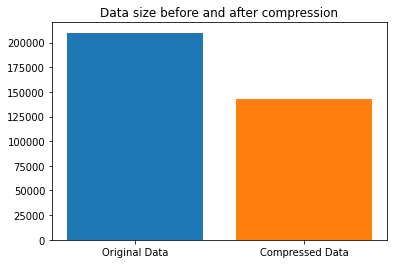

In [4]:
# plotting for better visuals
plt.bar('Original Data', originalData.size, align='center')
plt.bar('Compressed Data', compressedData.size, align='center')
plt.title('Data size before and after compression')
plt.savefig('HuffmanCode_Comparision.png')
plt.show()
plt.close()

In [5]:
# hamming code
JSCData = hammingCoding(compdata)
correctedData = hammingCoding(origData)

m =  142846
r =  18
Data transferred is  [0 0 0 ... 1 1 0]

m =  210000
r =  18
Data transferred is  [1 0 0 ... 0 0 1]



In [6]:
EbNo = np.arange(-5,25)
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.title('BER vs SNR')
plt.yscale('log')
plt.grid(True)
monteTransmit(EbNo, originalData)
monteTransmit(EbNo, compressedData)
monteTransmit(EbNo, correctedData)
recieveArr = monteTransmit(EbNo, JSCData)
plt.legend()
plt.savefig('BERSNR/BERSNR_Comparision'+str(z)+'.png', format='png')
plt.show()
plt.close()

The number of errors in our code is  575
Data Transmited is  [1 0 0 ... 0 0 0]
Data Recieved is  [1 0 0 ... 0 0 0]
The Bit error ratio is  0.0027380952380952383

The number of errors in our code is  1
Data Transmited is  [0 0 0 ... 1 1 1]
Data Recieved is  [0 0 0 ... 1 1 1]
The Bit error ratio is  7.000448028673835e-06

The number of errors in our code is  1
Data Transmited is  [1 0 0 ... 0 0 1]
Data Recieved is  [1 0 0 ... 0 0 1]
The Bit error ratio is  4.761360606406887e-06

The number of errors in our code is  841
Data Transmited is  [0 0 0 ... 1 1 0]
Data Recieved is  [0 0 0 ... 1 1 0]
The Bit error ratio is  0.005886717437562997



TypeError: can only concatenate str (not "int") to str

In [ ]:
# printing out everything and finiding the error

print("Original Data is", originalData)
print("Data after compressions is", compressedData)
print("Transmitted data is", JSCData)
print("Recieved data is", recieveArr)
print("")